ในกิจกรรมสุดท้ายเราจะทดลองเกี่ยวกับ [dot product](https://en.wikipedia.org/wiki/Dot_product)  ก่อนอื่นเรามาเขียนฟังก์ชันเกี่ยวกับขนาดและการปรับขนาดของเวกเตอร์กันก่อน

In [1]:
# ฟังก์ชันจากครั้งก่อน
def scalar_mult(a, v):
    return [a*x for x in v]

def vadd(v1, v2):
    return [v1[i] + v2[i] for i in range(len(v1))]

### ขนาดและเวกเตอร์หน่วย

ในกรณีที่เราพิจารณาเวกเตอร์บนจำนวนจริง (vectors over reals) เราสามารถนิยาม **ความยาว** ของเวกเตอร์เป็นระยะทางแบบยุคลิดระหว่างจุด (0,0) หรือ (0,0,0) กับจุดปลายของเวกเตอร์ได้

นั่นคือถ้าเรามีเวกเตอร์ $(x,y,z)$ เราจะนิยามความยาวของเวกเตอร์ดังกล่าวว่าเท่ากับ $\sqrt{x^2+y^2+z^2}$   

*หมายเหตุ* ในกรณีของปริภูมิเวกเตอร์แบบอื่น ๆ เราจะสามารถนิยามแนวคิดเกี่ยวกับความยาวนี้ให้มีความเป็นทั่วไปได้ เราจะกล่าวถึงเรื่องในการเรียนครั้งถัด ๆ ไป

### >>> งาน 3.1 เขียนฟังก์ชัน `vlength`

In [2]:
import math

# งานของคุณ: เขียนฟังก์ชันนี้ให้สมบูรณ์ สามารถใช้ฟังก์ชัน math.sqrt เพื่อคำนวณรากที่สองได้
def vlength(v):
    return math.sqrt(sum([x*x for x in v]))

In [3]:
# ทดสอบผลลัพธ์ ควรจะได้เท่ากับ [1.4142135623730951, 1.0, 2.449489742783178]

print([vlength([1,1]), vlength([1,0,0,0]), vlength([1,2,1])])

[1.4142135623730951, 1.0, 2.449489742783178]


เมื่อเราได้รับเวกเตอร์ $v$ เราสามารถหาค่า $\alpha$ ที่ทำให้ความยาวของ $\alpha v$ มีค่าเท่ากับ 1 ได้  ในที่นี้เราจะเรียกเวกเตอร์ที่มีความยาวเท่ากับ 1 ว่าเวกเตอร์หน่วย  กระบวนการที่หาเวกเตอร์หน่วยที่มีทิศทางเดียวกับเวกเตอร์ $v$ เรียกว่าการ **normalize**

### >>> งาน 3.2 เขียนฟังก์ชัน vnormalize

In [4]:
# งานของคุณ: เขียนฟังก์ชันนี้ให้สมบูรณ์
def vnormalize(v):
    vl = vlength(v)
    return [x/vl for x in v]

In [5]:
# ทดสอบผลลัพธ์ ควรได้เท่ากับ
# [0.7071067811865475, 0.7071067811865475]
# [0.19611613513818404, 0.9805806756909202]

print(vnormalize([1,1]))
print(vnormalize([1,5]))

[0.7071067811865475, 0.7071067811865475]
[0.19611613513818404, 0.9805806756909202]


## ข้อมูลทดสอบ
เราจะโหลดเซตของเวกเตอร์ในสองมิติเพื่อทดสอบ ข้อมูลนี้อยู่ในไฟล์ `face.txt`

In [6]:
def load_face():
    vectors = []
    for line in open('face.txt').readlines():
        items = line.strip().split()
        vectors.append([float(items[0]), float(items[1])])
    return vectors

fvectors = load_face()

In [7]:
# ในกิจกรรมนี้เราจะ plot แบบ scatter เป็นหลัก
import matplotlib.pyplot as plt

def plot_scatter(vectors):
    vectors = list(vectors)
    xx = [v[0] for v in vectors]
    yy = [v[1] for v in vectors]
    xmin, xmax = min(xx), max(xx)
    ymin, ymax = min(yy), max(yy)
    
    if ymin > 0: ymin = 0
    if ymax < 0: ymax = 0
    if xmin > 0:xmin = 0
    if xmax < 0:xmax = 0
    
    plt.axis([xmin - 1, xmax + 1, ymin - 1, ymax + 1])
    plt.scatter(xx,yy)

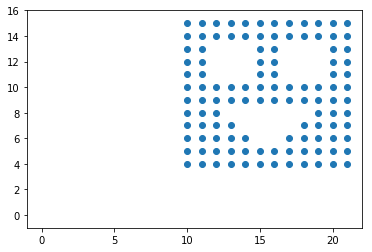

In [8]:
plot_scatter(fvectors)

### ฟังก์ชัน `map`

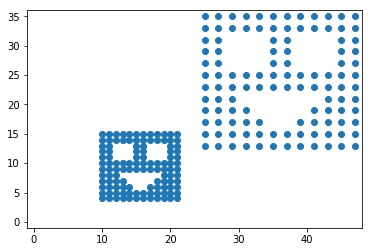

In [9]:
# ด้านล่างเป็นตัวอย่างการใช้ฟังก์ชัน map ในการ apply function f ในสมาชิกทุกตัวใน fvectors

def dosomething(v):
    return vadd(scalar_mult(2,v), [5,5])

plot_scatter(fvectors + list(map(dosomething, fvectors)))

### >>> งาน 3.3 ทดลองกับ face

ทดลองแก้ฟังก์ชัน `dosomething2` ด้านล่าง ให้ย้ายรูปหน้าไปที่ต่าง ๆ และปรับขนาด

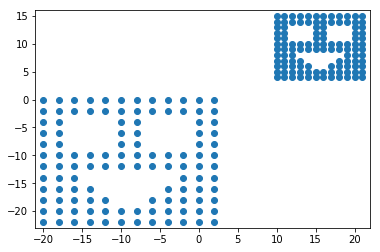

In [15]:
def dosomething2(v):
    return vadd([-40,-30], scalar_mult(2,v))

plot_scatter(fvectors + list(map(dosomething2, fvectors)))

## Dot product
นิยามของ dot product ของเวกเตอร์ `u` และ `v` คือผลรวมของผลคูณของแต่ละคู่ของ element ที่ตรงกันใน `u` และ `v`

### >>> งาน 3.4 เขียนฟังก์ชัน `dot_product`

In [18]:
def dot_product(u,v):
    return sum([u[i]*v[i] for i in range(len(v))])

In [19]:
# ทดสอบได้ด้านล่าง คำตอบควรเป็น [6, 0, 0, 23.5]
print([dot_product([1,1,1],[1,2,3]),
       dot_product([1,0,0],[0,0,1]),
       dot_product([1,2],[-2,1]),
       dot_product([1,2,3,4,5],[-2,1,0.5,3,2])])

[6, 0, 0, 23.5]
